## Import modules and functions

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims

## Read CSV file with values for stimulation

In [2]:
filename=r'/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/Analysis from Silvio/final analysis files from silvio/final_spontaneousactivity_clumpsvctrl.CSV'

In [19]:
df_stim=pd.read_csv(filename,sep=',',header=None)

In [28]:
df_stim.columns=['Ctrl spont. frequency','Ctrl spont. amp','Clumps spont. frequency','Clumps spont. amp']

## Make stim/ctrl into a categorical variable

In [29]:
df_stimnew={"Ctrl or clump":[],"Spont. freq":[],"Spont. amp":[]}

for i in range(0,(df_stim["Ctrl spont. frequency"].size - np.isnan(df_stim["Ctrl spont. frequency"]).sum()-1)):
    df_stimnew["Ctrl or clump"].append('Ctrl')
    df_stimnew["Spont. freq"].append(df_stim['Ctrl spont. frequency'][i])
    df_stimnew["Spont. amp"].append(df_stim['Ctrl spont. amp'][i])
    
for i in range(0,(df_stim["Clumps spont. frequency"].size - np.isnan(df_stim["Clumps spont. frequency"]).sum()-1)):
    df_stimnew["Ctrl or clump"].append('Clumps')
    df_stimnew["Spont. freq"].append(df_stim['Clumps spont. frequency'][i])
    df_stimnew["Spont. amp"].append(df_stim['Clumps spont. amp'][i])

df_stimnew=pd.DataFrame(df_stimnew)

## Bar plot: ctrl V clumps amp

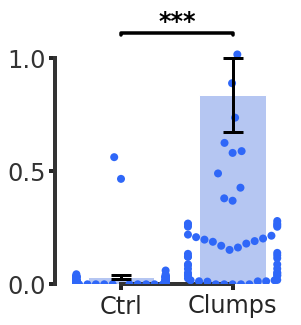

In [22]:
##bar plot

var="Spont. amp"

sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

colors={"Clumps":"#2F67F8","Ctrl":"#333333"}

fig=plt.figure(figsize=(4,5))

g=sns.barplot(data=df_stimnew,y=var,x="Ctrl or clump"
            ,color="#abc2fc",ci=None)

g=sns.swarmplot(data=df_stimnew,y=var,x="Ctrl or clump"
            ,color="#2F67F8",size=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(g, .6)        
plt.errorbar(x=[0,1],
             y=[df_stimnew[df_stimnew["Ctrl or clump"]=="Ctrl"][var].mean(),
                df_stimnew[df_stimnew["Ctrl or clump"]=="Clumps"][var].mean()],
             yerr=[df_stimnew[df_stimnew["Ctrl or clump"]=="Ctrl"][var].sem(),
                df_stimnew[df_stimnew["Ctrl or clump"]=="Clumps"][var].sem()],
             xerr=None,
             ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)


        

plt.ylim([0,1.2])
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)
plt.xticks(g.get_xticks(),
           size=24)
plt.yticks(g.get_yticks(),size=24,color='#333333')
g.grid(False)

x1, x2 = 0,1
y= 1.1
h=0.01
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')

diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'11_spontaneous_amp.svg', bbox_inches='tight', format='svg')

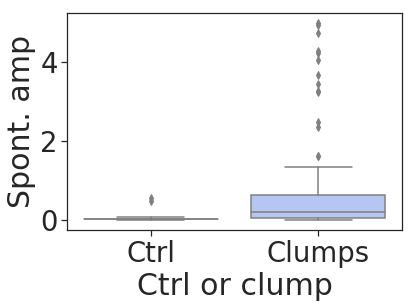

In [7]:
g=sns.boxplot(data=df_stimnew,y=var,x="Ctrl or clump"
            ,color="#abc2fc")

## Plot spont freq

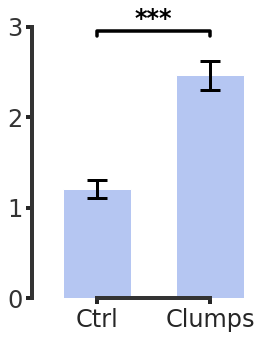

In [30]:
##bar plot

var="Spont. freq"

sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

colors={"Clumps":"#2F67F8","Ctrl":"#333333"}

fig=plt.figure(figsize=(4,5))

g=sns.barplot(data=df_stimnew,y=var,x="Ctrl or clump"
            ,color="#abc2fc",ci=None)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(g, .6)        
plt.errorbar(x=[0,1],
             y=[df_stimnew[df_stimnew["Ctrl or clump"]=="Ctrl"][var].mean(),
                df_stimnew[df_stimnew["Ctrl or clump"]=="Clumps"][var].mean()],
             yerr=[df_stimnew[df_stimnew["Ctrl or clump"]=="Ctrl"][var].sem(),
                df_stimnew[df_stimnew["Ctrl or clump"]=="Clumps"][var].sem()],
             xerr=None,
             ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)


        

plt.ylim([0,3])
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)
plt.xticks(g.get_xticks(),
           size=24)
plt.yticks(g.get_yticks(),size=24,color='#333333')
g.grid(False)

x1, x2 = 0,1
y= 2.9
h=0.05
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')

diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'11_spontaneous_freq.svg', bbox_inches='tight', format='svg')

## ttests

In [27]:
df_stimnew={"Ctrl or clump":[],"Mean int":[],"Int error":[]}

for i in range(0,(df_stim["Ctrl spont. frequency"].size - np.isnan(df_stim["Ctrl spont. frequency"]).sum()-1)):
    df_stimnew["Ctrl or clump"].append('Ctrl')
    df_stimnew["Spont. freq"].append(df_stim['Ctrl spont. frequency'][i])
    df_stimnew["Spont. amp"].append(df_stim['Ctrl spont. amp'][i])
    
for i in range(0,(df_stim["Clumps spont. frequency"].size - np.isnan(df_stim["Clumps spont. frequency"]).sum()-1)):
    df_stimnew["Ctrl or clump"].append('Clumps')
    df_stimnew["Spont. freq"].append(df_stim['Clumps spont. frequency'][i])
    df_stimnew["Spont. amp"].append(df_stim['Clumps spont. amp'][i])

df_stimnew=pd.DataFrame(df_stimnew)

KeyError: 'Spont. freq'

In [31]:
dfclumps=df_stimnew[df_stimnew["Ctrl or clump"]=="Clumps"]
dfctrl=df_stimnew[df_stimnew["Ctrl or clump"]=="Ctrl"]

ctrl_freq=dfctrl["Spont. freq"]
ctrl_ampq=dfctrl["Spont. amp"]

clump_freq=dfclumps["Spont. freq"]
clump_ampq=dfclumps["Spont. amp"]

[stat, pfreq]=stats.ttest_ind(ctrl_freq,clump_freq)
[stat, pamp]=stats.ttest_ind(ctrl_ampq,clump_ampq)

print('frequency: '+str(pfreq))
print('amp: '+str(pamp))

frequency: 8.56768489602095e-10
amp: 2.4508258859247915e-06


## Check normality

In [24]:
variable="Spont. freq" #change me

x=df_stimnew[variable].values
normdvar=(x-x.mean())/x.std()
print(type(normdvar))

import scipy.stats as ss
[_,pval]=ss.kstest(normdvar,'norm')
if pval<0.05:
    print("The variable does not distribute normally")
else:
    print("The variable distributes normally")

sns.set(font_scale=1)
fig=plt.figure(figsize=(10,5))
fig.add_subplot(121)
sns.kdeplot(df_stimnew[variable],legend=False)
plt.title('Distribution of all conditions')

    

KeyError: 'Spont. freq'

In [ ]:
[stat, pval]=stats.normaltest(df_stimnew[variable].values, axis=0, nan_policy='propagate')
if pval<0.05:
    print('not normal :/')

## Mann whitney

In [32]:
dfclumps=df_stimnew[df_stimnew["Ctrl or clump"]=="Clumps"]
dfctrl=df_stimnew[df_stimnew["Ctrl or clump"]=="Ctrl"]

ctrl_freq=dfctrl["Spont. freq"]
ctrl_ampq=dfctrl["Spont. amp"]

clump_freq=dfclumps["Spont. freq"]
clump_ampq=dfclumps["Spont. amp"]

[stat, pfreq]=stats.mannwhitneyu(ctrl_freq,clump_freq)
[stat, pamp]=stats.mannwhitneyu(ctrl_ampq,clump_ampq)

print('frequency: '+str(pfreq))
print('amp: '+str(pamp))

frequency: 2.7503209185588855e-08
amp: 7.051011846072591e-15


In [40]:
clump_ampq.values

array([0.017516  , 0.20812   , 0.083692  , 0.26821   , 0.011893  ,
       1.6082    , 0.        , 0.088252  , 0.2194    , 2.343     ,
       0.4895    , 0.27942   , 0.13877   , 0.18768   , 0.        ,
       0.        , 0.1345    , 0.26807   , 0.62429   , 0.        ,
       0.25408   , 0.048578  , 0.03776   , 0.36896   , 0.20209   ,
       1.0148    , 0.21449   , 0.26434   , 0.88778   , 0.58012   ,
       0.1908    , 0.19719   , 0.26123   , 0.15192   , 0.58796   ,
       0.73577   , 0.25456   , 1.6159    , 0.013423  , 0.37956   ,
       2.4733    , 0.013247  , 0.12191   , 0.087929  , 0.17974   ,
       0.        , 0.026056  , 0.16245   , 3.2668    , 0.17017001,
       0.11522   , 0.42655   , 0.019251  , 3.2329    , 4.2209    ,
       0.040782  , 0.06842   , 4.0456    , 0.037716  , 0.050426  ,
       0.12161   , 0.013029  , 1.3432    , 4.2738    , 0.12801   ,
       0.051929  , 3.4462    , 4.7358    , 4.9392    , 3.6559    ,
       0.068968  , 4.9899    , 0.043797  , 0.017763  ])

## Read stimulation data

In [11]:
filename=r'/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/Analysis from Silvio/final analysis files from silvio/final_stim_clumpsvctrl.CSV'

In [12]:
df_stim=pd.read_csv(filename,sep=',',header=None)

In [13]:
df_stim.columns=['time','Ctrl mean int','Ctrl error','Clumps mean int','Clumps error']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

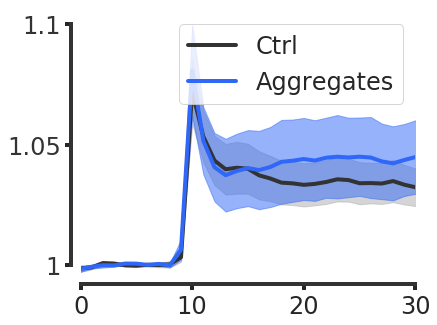

In [15]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

fig=plt.figure(figsize=(6,5))
g=fig.gca()
plt.plot(df_stim['time'],df_stim['Ctrl mean int'],color="#333333",linewidth=4)

plt.plot(df_stim['time'],df_stim['Clumps mean int'],color="#2F67F8",linewidth=4)
plt.legend(['Ctrl','Aggregates'],fontsize=24)

x=df_stim['time']
y=df_stim['Ctrl mean int']
yerr=df_stim['Ctrl error']
#plt.errorbar(x,y,yerr,color="#333333",linewidth=2,capsize=6,capthick=3)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#adadad', facecolor='#adadad')

x=df_stim['time']
y=df_stim['Clumps mean int']
yerr=df_stim['Clumps error']
#plt.errorbar(x,y,yerr,color="#2F67F8",linewidth=2,capsize=6,capthick=3)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#2F67F8', facecolor='#2F67F8')

plt.xlim(0,30)
scale_x=1/1
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
g.yaxis.set_major_formatter(ticks_x)
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)
plt.xticks(g.get_xticks(),
           size=24)
plt.yticks(g.get_yticks(),size=24,color='#333333')
g.grid(False)

diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'supp11_stimulation.svg', bbox_inches='tight', format='svg')

## Number cells

In [261]:
df_stim["Ctrl mean int"].size - np.isnan(df_stim["Ctrl mean int"]).sum()

39

In [262]:
df_stim["Clumps mean int"].size - np.isnan(df_stim["Clumps mean int"]).sum()

39